# Исследование объявлений о продаже квартир

 

# Цель исследования:
Нужно научиться определять рыночную стоимость объектов недвижимости. Необходимо установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


# Описание данных:
Данные содержат различные показатели сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)\
•	balcony — число балконов\
•	ceiling_height — высота потолков (м)\
•	cityCenters_nearest — расстояние до центра города (м)\
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)\
•	first_day_exposition — дата публикации\
•	floor — этаж\
•	floors_total — всего этажей в доме\
•	is_apartment — апартаменты (булев тип)\
•	kitchen_area — площадь кухни в квадратных метрах (м²)\
•	last_price — цена на момент снятия с публикации\
•	living_area — жилая площадь в квадратных метрах (м²)\
•	locality_name — название населённого пункта\
•	open_plan — свободная планировка (булев тип)\
•	parks_around3000 — число парков в радиусе 3 км\
•	parks_nearest — расстояние до ближайшего парка (м)\
•	ponds_around3000 — число водоёмов в радиусе 3 км\
•	ponds_nearest — расстояние до ближайшего водоёма (м)\
•	rooms — число комнат\
•	studio — квартира-студия (булев тип)\
•	total_area — общая площадь квартиры в квадратных метрах (м²)\
•	total_images — число фотографий квартиры в объявлении\

# План работы:
1.Ознакомиться с данными \
2.Провести предобработку данных(избавиться от пропусков, дубликатов, ошибок в данных)\
3.Добавить в таблицу новые столбцы:\
•	цена одного квадратного метра;\
•	день недели публикации объявления; \
•	месяц публикации объявления;\
•	год публикации объявления;\
•	тип этажа квартиры;\
•	расстояние до центра города в километрах.\
4.Провести исследовательский анализ данных: 
- Изучить взаимосвязи и закономерности между различными параметрами
- Построить вспомогательные графики и гистограммы.

5.Подготовить общие выводы на основании исследованных данных.

## Знакомство с данными. 

In [1]:
#Импортируем библиотеку pandas
import pandas as pd

In [2]:
#Импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

In [3]:
#Импортируем библиотеку numpy
import numpy as np

In [4]:
#считываем данные из файла в датафрейм, сохраняем в пременную data
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [5]:
#Проверка корректности считывания:
pd.set_option('display.max_columns', None)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
#Изучим общую информацию о полученном датафрейме.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

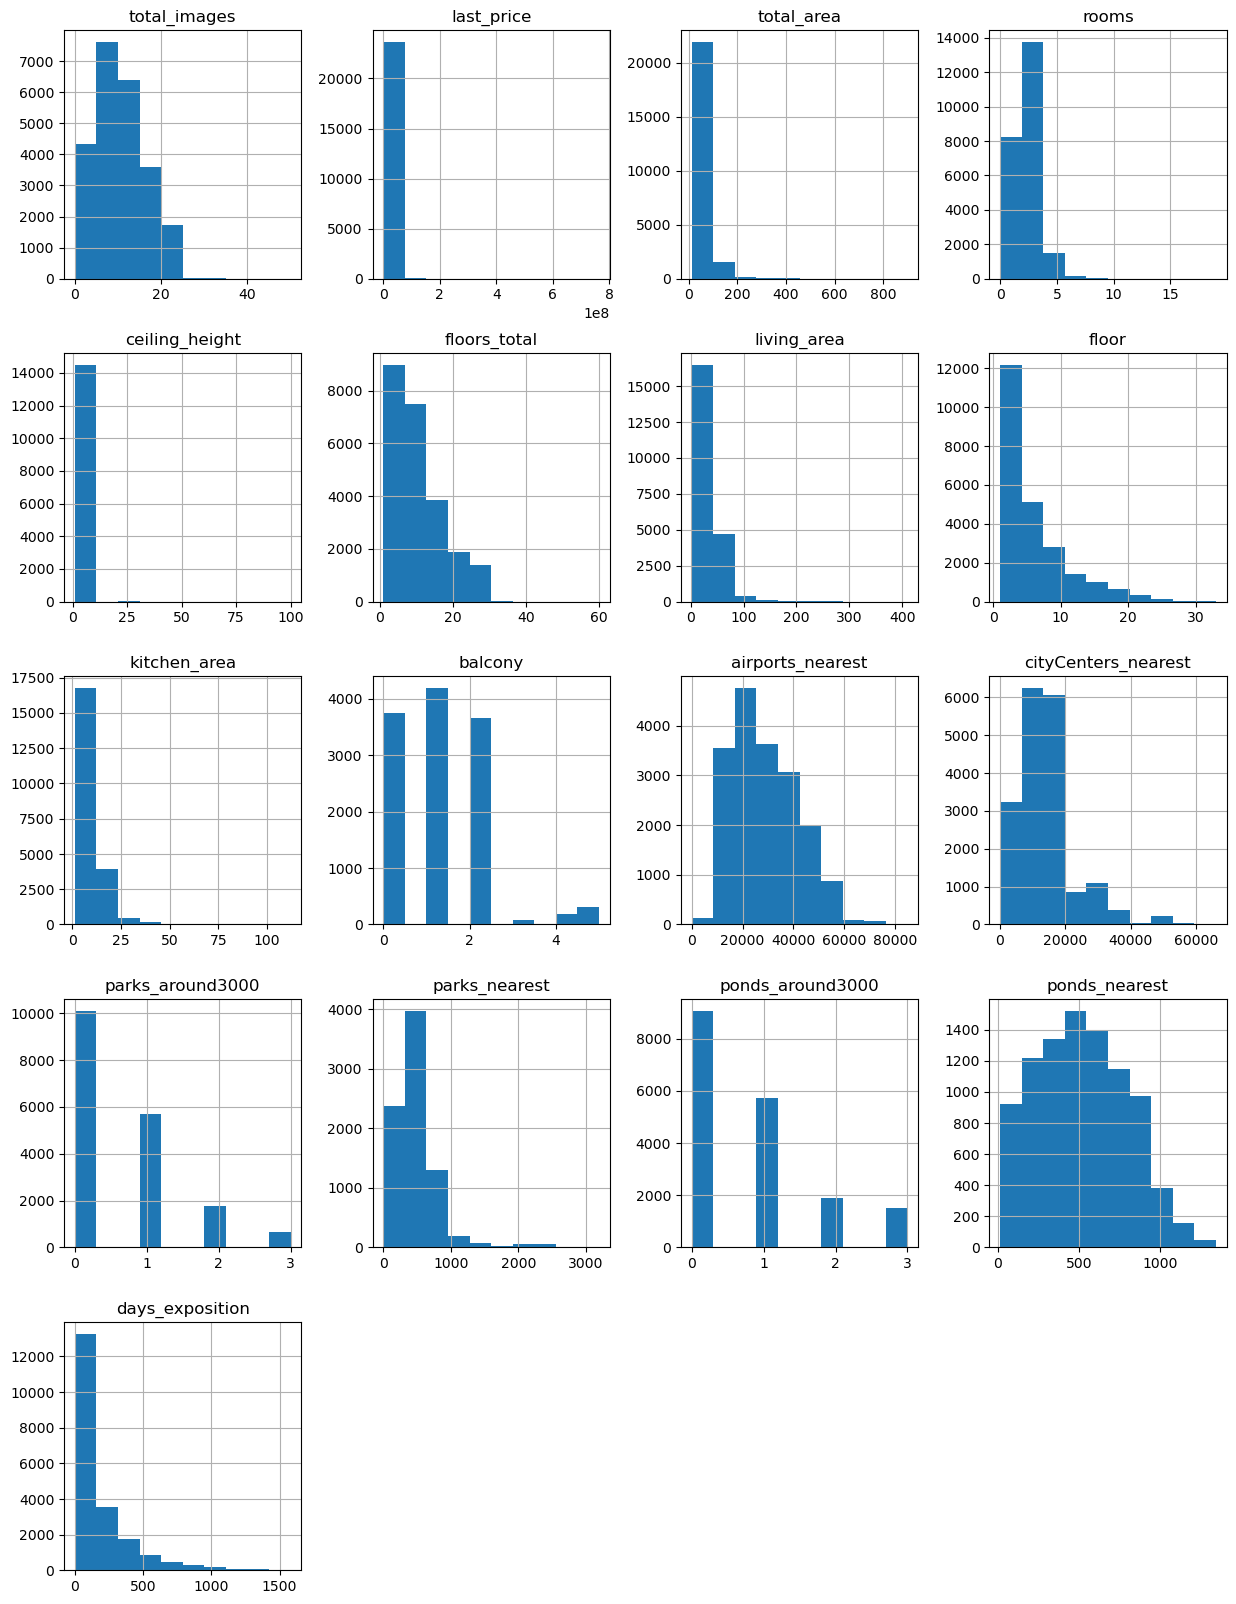

In [7]:
#Построим общую гистограмму для всех числовых столбцов таблицы. 
data.hist(figsize=(15, 20));

**Выводы:**

Мы произвели ознакомление с данными, полученными от сервиса "Яндекс Недвижимость", в ходе которого были обнаружены некоторые изъяны в данных: пропуски, несоответствие типов данных. Также были построены гистограммы для всех столбцов таблицы.
Обнаруженные недостатки в данных мы постараемся исправить в следующем разделе.

## Предобработка данных

### Удаление пропусков

Найдем и изучим пропущенные значения в столбцах: 



In [8]:
#Выведем на экран количество пропусков в каждой колонке.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#Заменяем пропуски
data['balcony'] = data['balcony'].fillna('0')

В текущих данных достаточно много пропущенных значений. Однако не все мы можем изменить, или что-либо с ними сделать.
Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. 
Такие пропуски было бы логично заменить на 0.
Также есть пропуски в столбце 'locality_name' - название населенного пункта.
Эти данные нужно удалить т.к. мы не можем считать их информативными.
т.к. произвести замены остальных пропусков мы не можем, оставляем данные в таком состоянии.


In [10]:
#Удаляем пропущенные значения в столбце с названием населенного пункта:
data = data.dropna(subset=['locality_name'])

In [11]:
data['is_apartment'].unique()
data['is_apartment'].value_counts()

is_apartment
False    2710
True       50
Name: count, dtype: int64

В столбце "is_apartment" обнаружено большое количество пропусков.
Апартаменты относятся к коммерческой недвижимости,а квартиры - к жилому фонду. 
Операции с недвижимостью в жилом фонде гораздо более распространены и популярны,чем с аппартаментами.
Поэтому, в данном исследовании будем считать, что вся недвижимость, статус которой не указан, будет принадлежать к жилым помещениям.
Также, произведем замену пропусков в столбцах "studio": если не указано, что квартира является студией, автоматически примем значение за "False"
Аналогичную замену произведем в столбце "open_plan": если не указано, что планировка не является открытой, заполним отсутствующие значения "False"

In [12]:
#Соответственно, произведем замену значений:
data['is_apartment'] = data['is_apartment'].fillna('False')
data['studio'] = data['studio'].fillna('False')
data['open_plan'] = data['open_plan'].fillna('False')

#Проверяем, все ли пропуски были корректно заменены или удалены:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Пропуски обнаружены в следующих столбцах:
- ceiling_height           
- floors_total               
- living_area              
- kitchen_area       
- airports_nearest         
- cityCenters_nearest      
- parks_around3000         
- parks_nearest           
- ponds_around3000         
- ponds_nearest           
- days_exposition 

Пропуски могли возникнуть из-за того, что пользователи оставили незаполненными некоторые поля (т.к. данные поля необязательны для заполнения).
Данные, которые заполняются автоматически(например столбцы parks_nearest и ponds_around3000)могут отсутствовать по причине того, что пользователь не указал адрес, поэтому их стало невозможно расчитать.

In [13]:
data['ceiling_height'].mean()

2.7712870945479646

In [14]:
#Заполним пропуски в столбце высота потолков (ceiling_height) медианными значениями (2.65)
data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna('2.65')
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

#### Типы данных

Рассмотрим типы данных в каждом столбце, при помощи метода info()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  object 
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest      18

Найдем столбцы, в которых нужно изменить тип данных.
Преобразуем тип данных в выбранных столбцах.

**Необходимо изменить тип данных следующих столбцов:**
  
*first_day_exposition*  object -> datetime (при помощи метода to_datetime() преобразуем в дату)

*balcony*               object -> int64  (здесь хранятся целочисленные значения, переводим строковые значения в числа)

*is_apartment*          object -> bool (здесь хранятся значения True/False - преобразуем в булевый тип данных

In [16]:
#Изменяем тип данных:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
#Проверяем:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  object        
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony              

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Работа с неявными дубликатами

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. 

In [17]:
#Изучим уникальные значения в столбце с названиями 
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
#Количество уникальных значений
len(data['locality_name'].unique())

364

In [19]:
data.sort_values(by=['locality_name'], ascending=[False])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15459,8,2000000.0,59.0,2018-11-18,3,2.65,2.0,42.3,2,True,False,False,6.5,1,село Шум,NaN,NaN,NaN,NaN,NaN,NaN,9.0
19176,8,1100000.0,30.0,2017-04-17,1,2.65,2.0,15.8,1,True,False,False,6.0,0,село Старая Ладога,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4672,0,1800000.0,55.0,2018-02-18,2,2.65,3.0,NaN,1,True,False,False,NaN,0,село Старая Ладога,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18739,9,2250000.0,42.0,2017-12-03,2,2.65,5.0,NaN,4,True,False,False,NaN,0,село Русско-Высоцкое,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21082,12,2300000.0,48.0,2018-03-04,2,2.65,5.0,28.6,2,True,False,False,7.4,0,село Русско-Высоцкое,NaN,NaN,NaN,NaN,NaN,NaN,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,4,950000.0,44.0,2018-05-05,2,2.65,5.0,NaN,2,True,False,False,6.0,1,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,156.0
14637,11,750000.0,42.0,2017-12-18,2,2.65,5.0,NaN,5,True,False,False,NaN,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45.0
19186,8,970000.0,61.5,2018-04-04,3,2.65,5.0,47.4,1,True,False,False,6.0,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,273.0
22267,0,720000.0,44.0,2018-09-09,2,2.65,3.0,NaN,2,False,False,False,NaN,1,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [20]:
# Устранение неявных дубликатов
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
#замена произведена успешно, количество уникальных названий сократилось.
len(data['locality_name'].unique())

330

In [21]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

На этом с поиском дубликатов закончим. Даже если и существует "поселок" и "поселок городского типа"(разный статус) с одним и тем же названием, нет возможности уточнить корректность информации.

### Работа с аномальными данными

In [22]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650,23650.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2017-11-10 00:03:57.463002112,2.070106,10.675875,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,2018-08-27 00:00:00,3.000000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.682278,1.089640e+07,35.661808,NaN,1.078620,6.594823,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916


Наблюдаем аномалии в столбцах:
"total_area" - 900 квадратных метров!
"rooms" - 19 комнат!
"ceiling_height" - высота потолков 100 метров!
"living_area" - 409.7 квадратных метров!
Посмотрим на распределение значений в этих столбцах, при необходимости избавимся от аномальных значений.

Удалим очевидные аномальные значения,которые выходят за границы 99-го процентиля:

In [23]:
np.percentile (data['total_area'], [25, 50, 75, 90, 99])
#99% всех квартир площадью менее 200 м^2

array([ 40.   ,  52.   ,  69.7  ,  93.5  , 197.557])

In [24]:
#Количество удаляемых значений
data.query('total_area > 200')['total_area'].count()
#удаляем
data.drop(index=data.query('total_area > 200').index,inplace=True)

In [25]:
np.percentile (data['rooms'], [25, 50, 75, 90, 99])

array([1., 2., 3., 3., 5.])

In [26]:
#удаляем недвижимость с количеством комнат, более 5
data.query('rooms > 5')['rooms'].count()
data.drop(index=data.query('rooms > 5').index,inplace=True)

In [27]:
data['ceiling_height'] = data['ceiling_height'].astype(float)

In [28]:
data.query('ceiling_height > 4')['ceiling_height'].count()
data.drop(index=data.query('ceiling_height > 4').index,inplace=True)

In [29]:
#Для удобства работы разделим данные на 1 млн (1000000)
data['last_price'] = data['last_price']/1000000

In [30]:
# Стоимость объекта (last_price). 
np.percentile (data['last_price'], [25, 50, 75, 90, 95, 98, 99])

array([ 3.4       ,  4.6       ,  6.6495    , 10.3       , 13.9759    ,
       20.9       , 27.24494284])

In [31]:
#Удалим очевидные аномальные значения,которые выходят за границы 98-го процентиля:
data.drop(index=data.query('last_price > 21').index,inplace=True)

In [32]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22823.000000,22823.000000,22823.000000,22823,22823.000000,22823.000000,22741.000000,21024.000000,22823.000000,20652.000000,22823.000000,17329.000000,17346.000000,17347.000000,7504.000000,17347.000000,8509.000000,19870.000000
mean,9.786706,5.403295,56.224142,2017-11-13 02:39:30.135389696,1.992595,2.683234,10.767029,32.181407,5.907944,10.098070,0.594663,28880.310405,14537.821630,0.584309,494.084888,0.738744,524.926783,177.328234
min,0.000000,0.012190,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000,39.950000,2017-05-17 00:00:00,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.000000,18396.000000,9888.000000,0.000000,289.000000,0.000000,303.000000,44.000000
50%,9.000000,4.550000,51.000000,2017-12-14 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26926.000000,13301.000000,0.000000,456.000000,0.000000,510.000000,93.000000
75%,14.000000,6.494679,67.000000,2018-08-28 00:00:00,3.000000,2.700000,16.000000,41.012500,8.000000,11.500000,1.000000,37434.000000,16465.000000,1.000000,616.000000,1.000000,736.000000,225.000000
max,50.000000,21.000000,200.000000,2019-05-03 00:00:00,5.000000,4.000000,60.000000,145.400000,33.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.625955,3.218638,23.162547,NaN,0.944284,0.190746,6.631306,15.570119,4.904305,4.691622,0.956627,12811.753585,8557.007054,0.779710,342.667807,0.914858,277.710706,216.023121


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22823 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22823 non-null  int64         
 1   last_price            22823 non-null  float64       
 2   total_area            22823 non-null  float64       
 3   first_day_exposition  22823 non-null  datetime64[ns]
 4   rooms                 22823 non-null  int64         
 5   ceiling_height        22823 non-null  float64       
 6   floors_total          22741 non-null  float64       
 7   living_area           21024 non-null  float64       
 8   floor                 22823 non-null  int64         
 9   is_apartment          22823 non-null  bool          
 10  studio                22823 non-null  bool          
 11  open_plan             22823 non-null  bool          
 12  kitchen_area          20652 non-null  float64       
 13  balcony              

Выводы по разделу 2 "Предобработка данных" 

Изучены и заменены  пропущенные значения в тех столбцах, где это возможно сделать без искажения данных.
Произведены замены типов данных.
Устранены неявные дубликаты,аномальные значения и пропуски(там, где это возможно).
В ходе предобработки данных число строк изменилось с 23698 до 23041. Было удалено не так много данных - 2,7% от общего количества.
Теперь можно приступать к дальнейшей работе с данными.

### Добавление новых столбцов

Добавим в таблицу новые столбцы со следующими параметрами:\
•	цена одного квадратного метра;\
•	день недели публикации объявления \
•	год публикации объявления;\
•	тип этажа квартиры \
•	расстояние до центра города в километрах 


In [34]:
#Добавим столбец "цена одного квадратного метра"
data['price_per_meter'] = data['last_price']*1000000 / data['total_area']
data['price_per_meter'] = data['price_per_meter'].astype('int')
data['price_per_meter']

0        120370
1         82920
2         92785
4        100000
5         95065
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_meter, Length: 22823, dtype: int32

In [35]:
#Добавим столбец "день недели публикации объявления"
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['weekday'].unique()

array([3, 1, 0, 2, 6, 5, 4])

In [36]:
#Добавим столбец "месяц публикации объявления"
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['month'].unique()

array([ 3, 12,  8,  6,  9, 11,  4,  5,  2,  7,  1, 10])

In [37]:
#Добавим столбец "год публикации объявления"
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['year'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [38]:
#Добавим столбец "тип этажа квартиры"
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category']

0        другой
1        первый
2        другой
4        другой
5        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 22823, dtype: object

In [39]:
#Добавим столбец "расстояние до центра города в километрах"
data['city_centers_nearest_km'] = data['cityCenters_nearest']/1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round()
data['city_centers_nearest_km']

0        16.0
1        19.0
2        14.0
4         8.0
5         NaN
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: city_centers_nearest_km, Length: 22823, dtype: float64

Выводы по разделу 3 "Добавление новых столбцов"
В таблицу успешно были добавлены вышеупомянутые столбцы, которые пригодятся нам для проведения исследовательского анализа данных.

### Исследовательский анализ данных

####	Изучим и построим отдельные гистограммы для следующих параметров объектов: 
o	общая площадь;\
o	жилая площадь;\
o	площадь кухни;\
o	цена объекта;\
o	количество комнат;\
o	высота потолков;\
o	этаж квартиры;\
o	тип этажа квартиры («первый», «последний», «другой»);\
o	общее количество этажей в доме;\
o	расстояние до центра города в метрах;\
o	расстояние до ближайшего аэропорта;\
o	расстояние до ближайшего парка;\
o	день и месяц публикации объявления.

In [40]:
#общая площадь
data['total_area'].describe()

count    22823.000000
mean        56.224142
std         23.162547
min         12.000000
25%         39.950000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

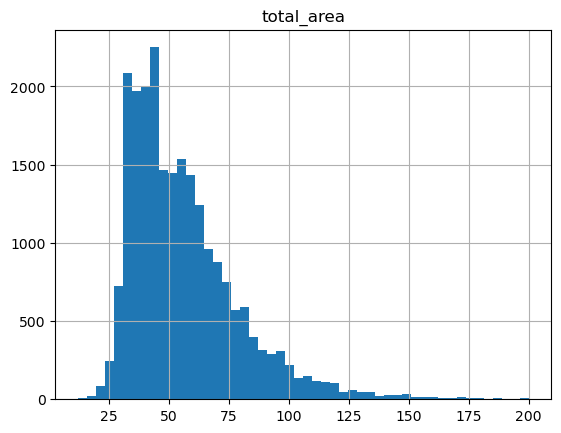

In [41]:
data.hist('total_area', bins=50, range=(12, 200))

Гистограмма соответствует распределению Пуассона
Меньше всего жилья площадью менее 25 и более 100 м^2
Наиболее часто встречается площадь 40-68 м^2

In [42]:
#жилая площадь
data['living_area'].describe()

count    21024.000000
mean        32.181407
std         15.570119
min          2.000000
25%         18.400000
50%         30.000000
75%         41.012500
max        145.400000
Name: living_area, dtype: float64

array([[<Axes: title={'center': 'living_area'}>]], dtype=object)

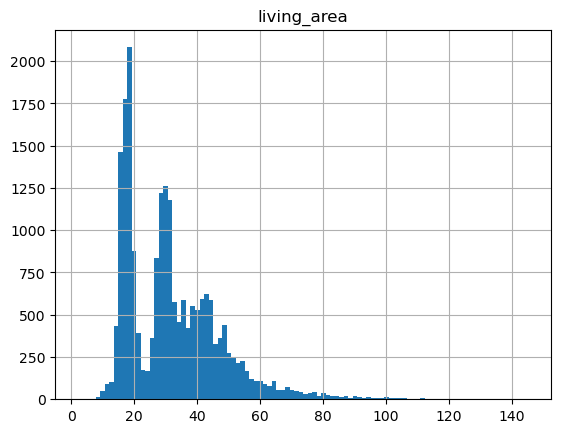

In [43]:
data.hist('living_area', bins=100)

Два пика значений(18 и 28 м) и отчетливый провал между ними (также распределение Пуассона)
Среднее почти равно медиане (32 и 30 м, соответственно)

In [44]:
#площадь кухни
data['kitchen_area'].describe()

count    20652.000000
mean        10.098070
std          4.691622
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         64.000000
Name: kitchen_area, dtype: float64

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

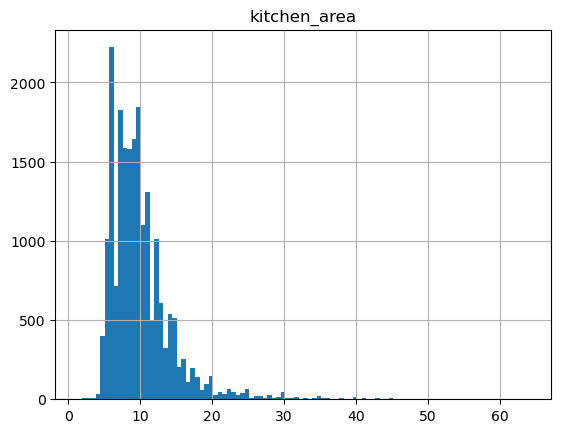

In [45]:
data.hist('kitchen_area', bins=100)

Значение площади кухонь, преимущественно, варьирует между 7 и 12 м

In [46]:
#цена объекта
data['last_price'].describe()

count    22823.000000
mean         5.403295
std          3.218638
min          0.012190
25%          3.400000
50%          4.550000
75%          6.494679
max         21.000000
Name: last_price, dtype: float64

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

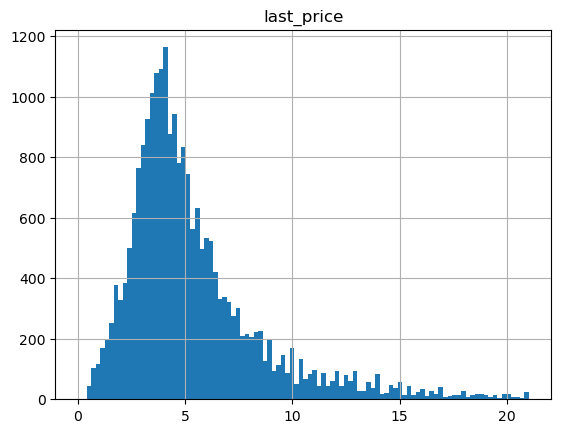

In [47]:
data.hist('last_price', bins=100, range=(0.012,21))

Основные значения распределены между 3,4 и 6,5 млн.
Медианное значение  окончательной стоимости = 4,5 млн 

In [48]:
#количество комнат
data['rooms'].describe()

count    22823.000000
mean         1.992595
std          0.944284
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

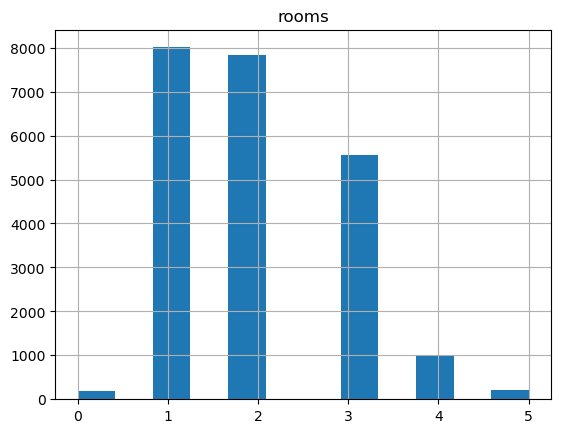

In [49]:
data.hist('rooms', bins=12)

Распределение Пуассона
0 комнат - вероятно, квартиры-студии, которых очень мало. Больше всего однокомнатных и двухкомнатаных.

In [50]:
#высота потолков
data['ceiling_height'].describe()

count    22823.000000
mean         2.683234
std          0.190746
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

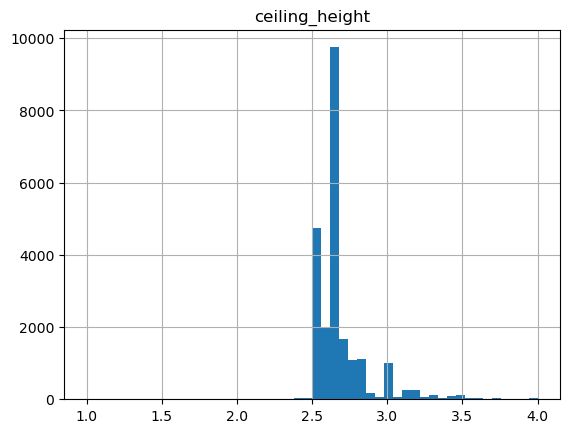

In [51]:
data.hist('ceiling_height', bins=50)

Самая распространенная высота потолков в квартире - 2.5 и 2,65 метров. Медиана = 2,65, среднее = 2,68. Все, что меньше, встречается крайне редко.

In [52]:
#этаж квартиры
data['floor'].describe()

count    22823.000000
mean         5.907944
std          4.904305
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

array([[<Axes: title={'center': 'floor'}>]], dtype=object)

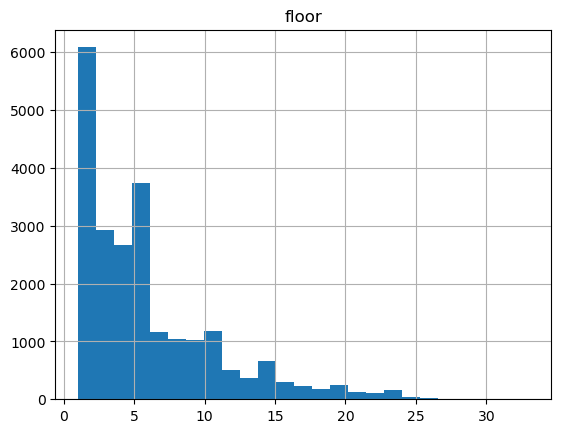

In [53]:
data.hist('floor', bins=25)

Данные говорят о том, что в исследуемой местности пробладает малоэтажная застройка(основная масса торгуемого 
жилья находится со 2 по 8 этаж)
Чем выше этаж, тем меньше выбор у покупателя объекта

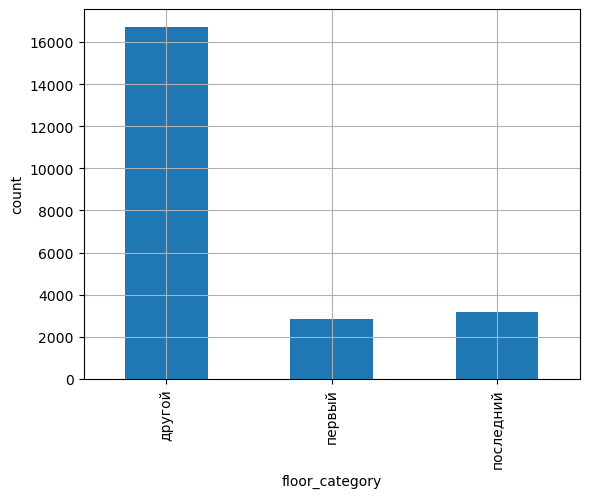

In [54]:
#тип этажа квартиры
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel='count', grid='True');

метод .hist() строит гистограммы основываясь только на числовых данных.
Здесь используем метод plot(), т.к. требуется сравнить категориальные переменные.
Наблюдаем достаточно очевидную закономерность: На первом этаже продается почти столько же квартир, как и на последнем.
Больше всего квартир находися на всех остальных этажах.

In [55]:
#общее количество этажей в доме
data['floors_total'].describe()

count    22741.000000
mean        10.767029
std          6.631306
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

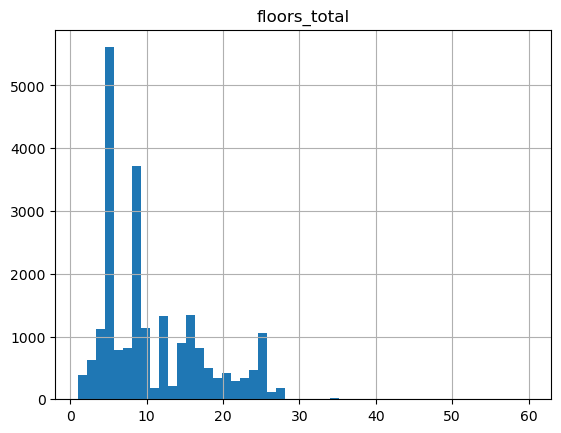

In [56]:
data.hist('floors_total', bins=50)

Больше всего 5-и и 9-и этажных домов.

In [57]:
#расстояние до центра города в метрах
data['cityCenters_nearest'].describe()

count    17346.000000
mean     14537.821630
std       8557.007054
min        208.000000
25%       9888.000000
50%      13301.000000
75%      16465.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

array([[<Axes: title={'center': 'cityCenters_nearest'}>]], dtype=object)

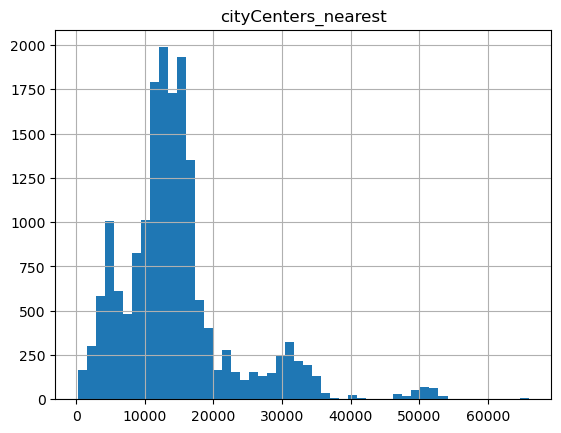

In [58]:
data.hist('cityCenters_nearest', bins=50)

основная масса торгуемой недвижимости сосредоточена на расстоянии не более 20 км от центра города(наиболее распространенные от 12 до 16 км)

In [59]:
#расстояние до ближайшего аэропорта
data['airports_nearest'].describe()

count    17329.000000
mean     28880.310405
std      12811.753585
min          0.000000
25%      18396.000000
50%      26926.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

array([[<Axes: title={'center': 'airports_nearest'}>]], dtype=object)

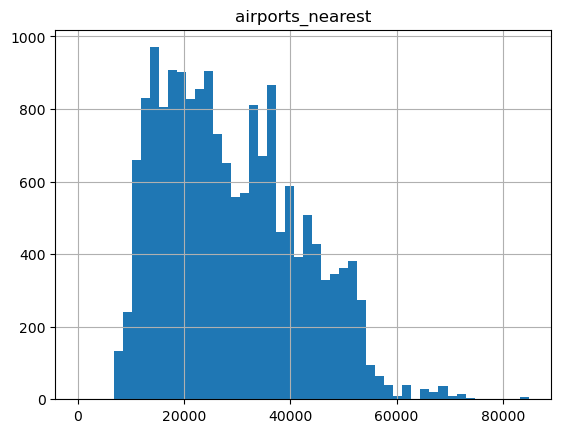

In [60]:
data.hist('airports_nearest', bins=50)

Очень большой разбор значений удаленности жилья от аэропортов(от 0 до 84,9 км). Медианное значение - 26,9 км

In [61]:
#расстояние до ближайшего парка
data['parks_nearest'].describe()

count    7504.000000
mean      494.084888
std       342.667807
min         1.000000
25%       289.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

array([[<Axes: title={'center': 'parks_nearest'}>]], dtype=object)

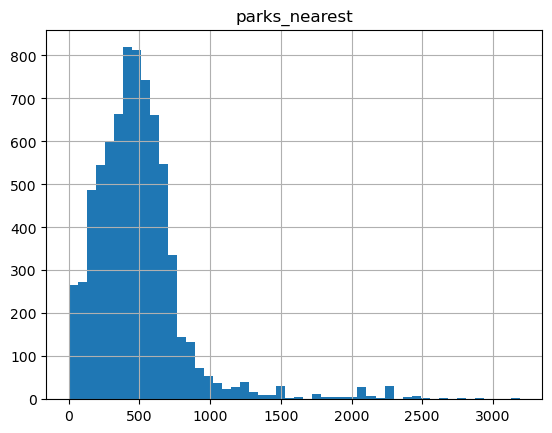

In [62]:
data.hist('parks_nearest', bins=50)

Застройщики стараются обеспечить всю необходимую ифраструктуру, при вводе жилья в эксплуатацию.
Поэтому, в основном, парки находятся не более чем в 700 метрах от жилых домов в Санкт-Перербурге и Ленинградской области. Таких квартир больше всего.

In [63]:
#день публикации объявления
data['weekday'].describe()

count    22823.000000
mean         2.568725
std          1.790269
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

array([[<Axes: title={'center': 'weekday'}>]], dtype=object)

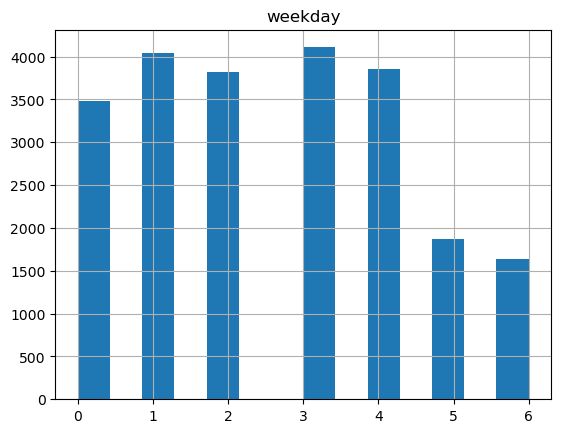

In [64]:
data.hist('weekday', bins=14)

Меньше всего объявлений о продаже публикуется в выходные. Пользуются популярностью вторник и четверг.

In [65]:
#месяц публикации объявления
data['month'].describe()

count    22823.000000
mean         6.404154
std          3.488542
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

array([[<Axes: title={'center': 'month'}>]], dtype=object)

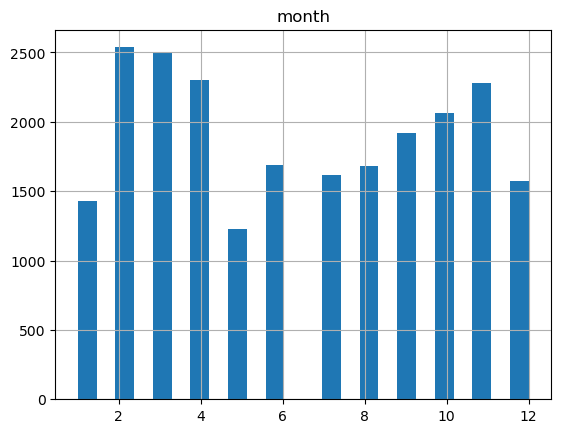

In [66]:
data.hist('month', bins=24)

Пик публикаций объявлений о продаже недвижимости приходися на февраль и март, а спад активности на январь и май.

- Общая площадь (total_area) колеблется в промежутке между 12 и 200 м^2. 
Медианное и среднее значения различаются незначительно и составляют 51,5 и 57,8 м^2, соответственно. Гистограма имеет более «сглаженный» вид, по сравнению с гистограммой жилой площади.
- Жилая площадь (living_area) составляет от 2 до 164 м^2,  медиана=30, среднее=33 м^2. График имеет 2 пика неизвестного происхождения.
- Площадь кухни (kitchen_area) варирует от 1 до 93,2 м^2,  медиана=9, среднее=10,4 м^2
В вышеописанных показателях медиана незначительно отличается от среднего, это значит, что нам успешно удалось избавиться от выбросов и аномальных значений.
- Цены квартир распределены между 3,4 и 6,5 млн. Медиана = 4,5 млн
*Как правило, чем меньшее количество комнат в объекте, тем больше количество таких объектов, исключение составляют квартиры-студии. Их даже меньше, чем пятикомнатных.*
- Самая распространенная высота потолков в квартире - 2.5 и 2,65 метров. Медиана = 2,65, среднее = 2,68.
- Типичный объект недвижимости в ленинградской области и Санкт-Петербурге расположен между 2 и 8 этажом, хотя  наиболее распространенная этажность оъектов недвижимости – от 5 до 16. Объектов на первом и последнем этажах гораздо меньше, чем на всех оставшихся.
- Медианное значение удаленности от центра города – 13,2 км, от ближайшего аэропорта – 27 км, от ближайшего парка 456 м.
Пользователи не любят публиковать объявления в выходные (суббота и воскресенье) и праздники, а также в декабре, январе и мае. Вероятно, публикаций меньше именно в эти месяцы, из-за обилия государственных праздников, и соответственно, выходных.

#### Как быстро продавались квартиры. 
Этот параметр показывает, сколько дней было размещено каждое объявление. 

In [67]:
#Изучим медиану, среднее и квартили.
data['days_exposition'].describe()

count    19870.000000
mean       177.328234
std        216.023121
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

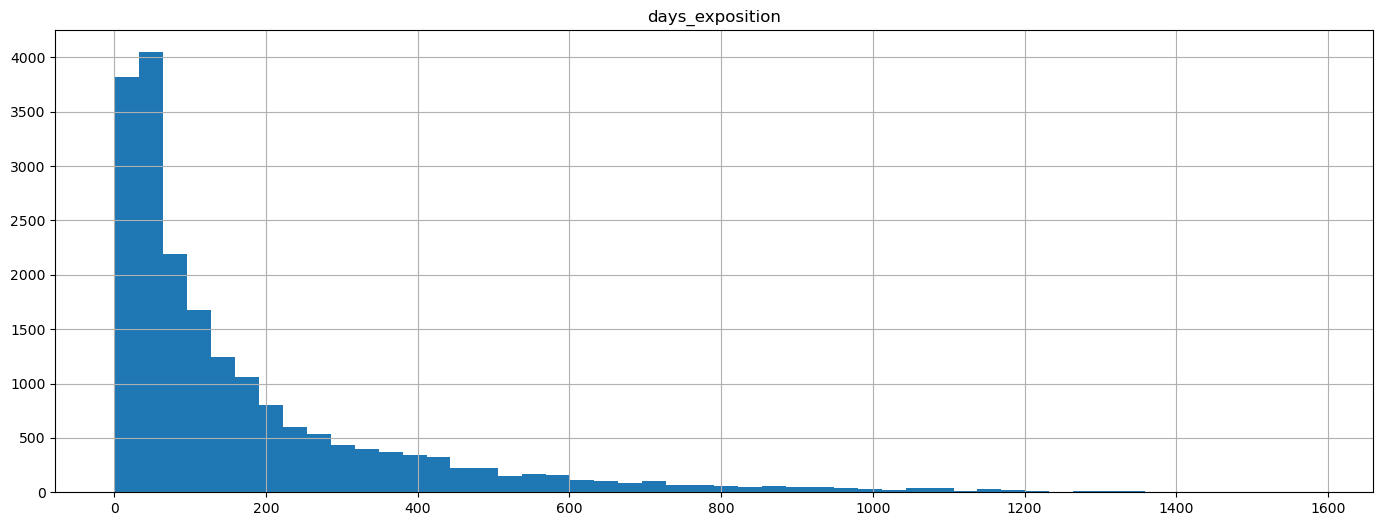

In [68]:
#Построим гистограмму days_exposition
data.hist('days_exposition', bins=50, figsize=(17, 6))

Средняя длительность продажи объекта составляет 179 дней, медианная - 95 дней.
Половина всех значений сосредоточена между  первым (25%) и третьим (75%) квартилями. Соответственно, обычно продажа объекта занимает от 45 до 229 дней.
Быстрыми считаются продажи в срок до 45 дней (все значения, что меньше первого квартиля).
Необычно долгие продажи - те, чтовыходят за рамки третьего квартиля - более 229 дней.

#### 	Какие факторы больше всего влияют на общую (полную) стоимость объекта - last_price ?
Изучим влияние:
o	общей площади;
o	жилой площади;
o	площади кухни;
o	количества комнат;
o	этажа, на котором расположена квартира (первый, последний, другой);
o	даты размещения (день недели, месяц, год).
Построим графики, которые покажут зависимость цены от указанных выше параметров.

0.7729473311555668

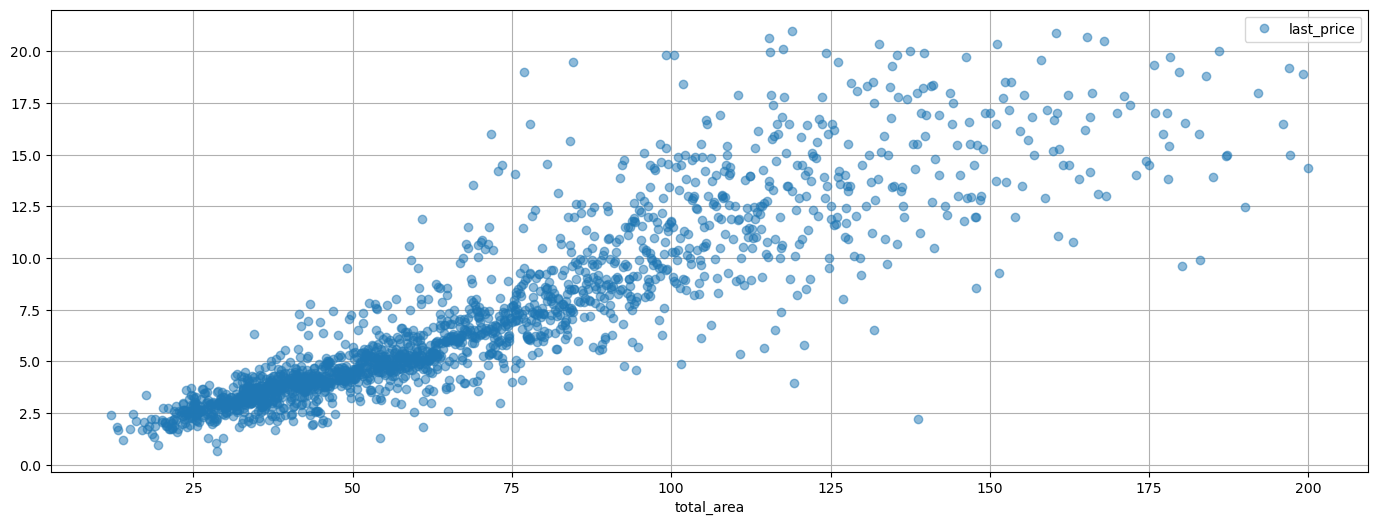

In [69]:
# Зависимость стоимости объекта от общей площади - total_area 
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median'])
pivot_table_total_area.plot(y = 'median', style = 'o', grid=True, figsize=(17,6), alpha=0.5)
data['total_area'].corr(data['last_price'])

На графике мы наблюдаем достаточно сильную положительную связь. Коэффициент корреляции Пирсона равен 0.77
Точки расположены плотно друг к другу, что указывает на прочную связь в первой половине графика (до 100 м^2)

0.6566617929092018

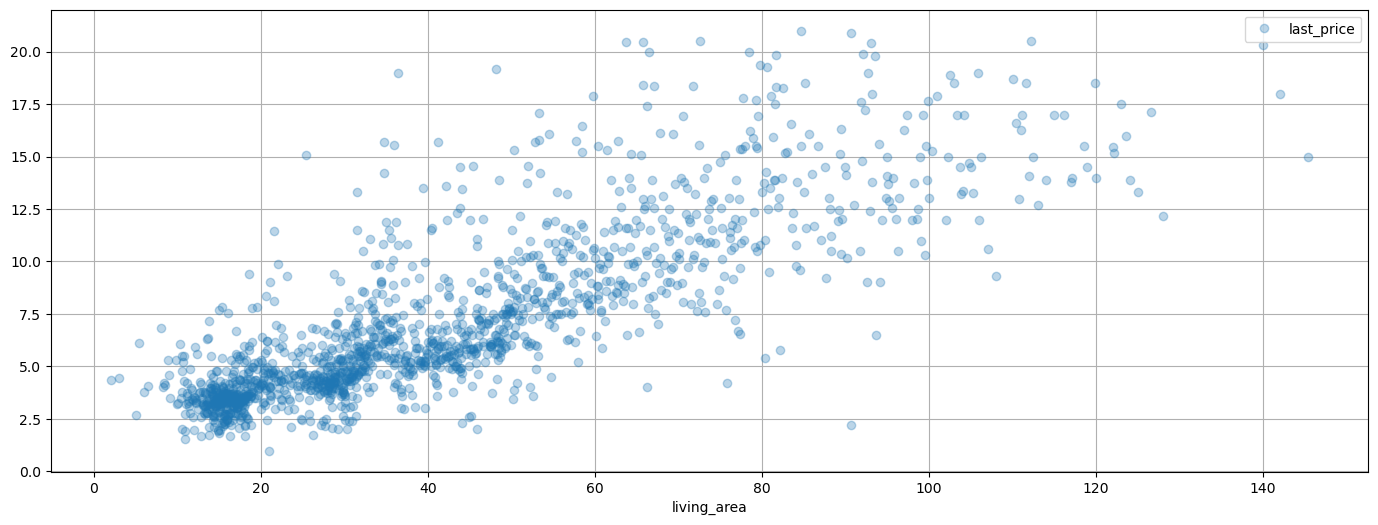

In [70]:
# Зависимость стоимости объекта от жилой площади - living_area 
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['median'])
pivot_table_living_area.plot(y = 'median', style = 'o', grid=True, figsize=(17,6), alpha=0.3)
data['living_area'].corr(data['last_price'])

Зависимость стоимости объекта от жилой площади отражена на графике. Коэффициент корреляции 0,66 указывает на наличие достаточно сильной положительной связи между двумя показателями. 

0.5801239144774762

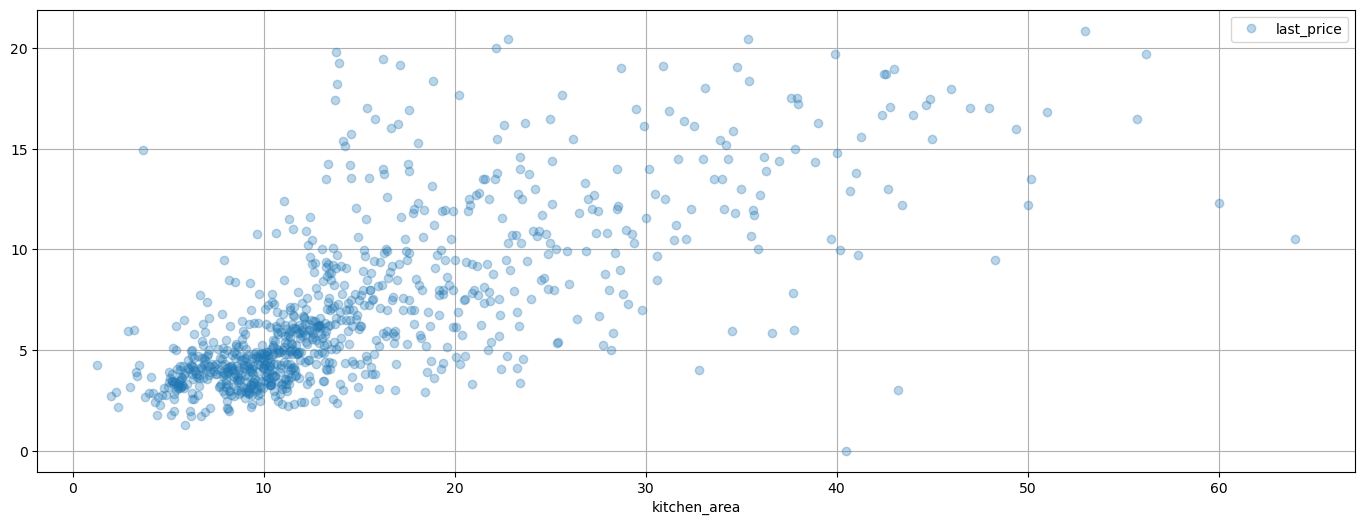

In [71]:
# Зависимость стоимости объекта от площади кухни - kitchen_area 
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['median'])
pivot_table_kitchen_area.plot(y = 'median', style = 'o', grid=True, figsize=(17,6), alpha=0.3)
data['kitchen_area'].corr(data['last_price'])

В целом, зависимость стоимости объекта от площади кухни почти повторяет аналогичную зависимость от жилой площади. Однако коэффициент корреляции здесь слабее и равен 0,58.

0.4892044324729954

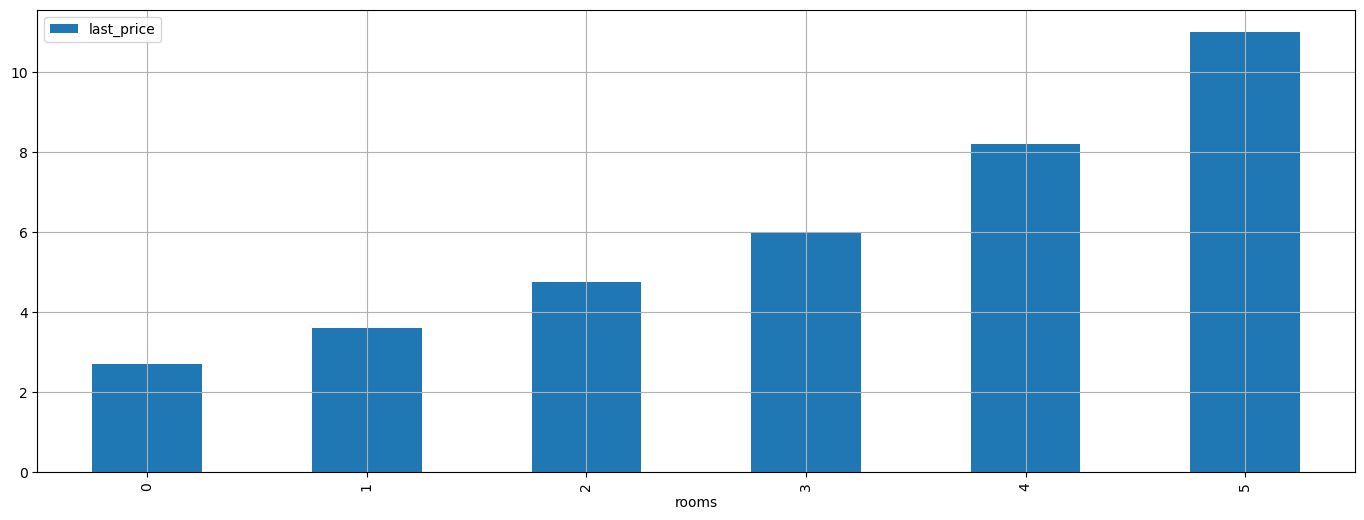

In [72]:
# Зависимость стоимости объекта от количества комнат - rooms 
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
pivot_table_rooms.plot(y = 'median', kind ='bar', grid=True, figsize=(17,6))
data['rooms'].corr(data['last_price'])

На данной столбчатой диаграмме отслеживается слабая положительная связь между стоимостью объекта и количеством жилых комнат. Коэффициент корреляции = 0.48 (данный коэффициент отражает только линейные связи).
очевидно, пятикомнатная квартира будет стоить дороже, чем квартира-студия.

<Axes: xlabel='floor_category'>

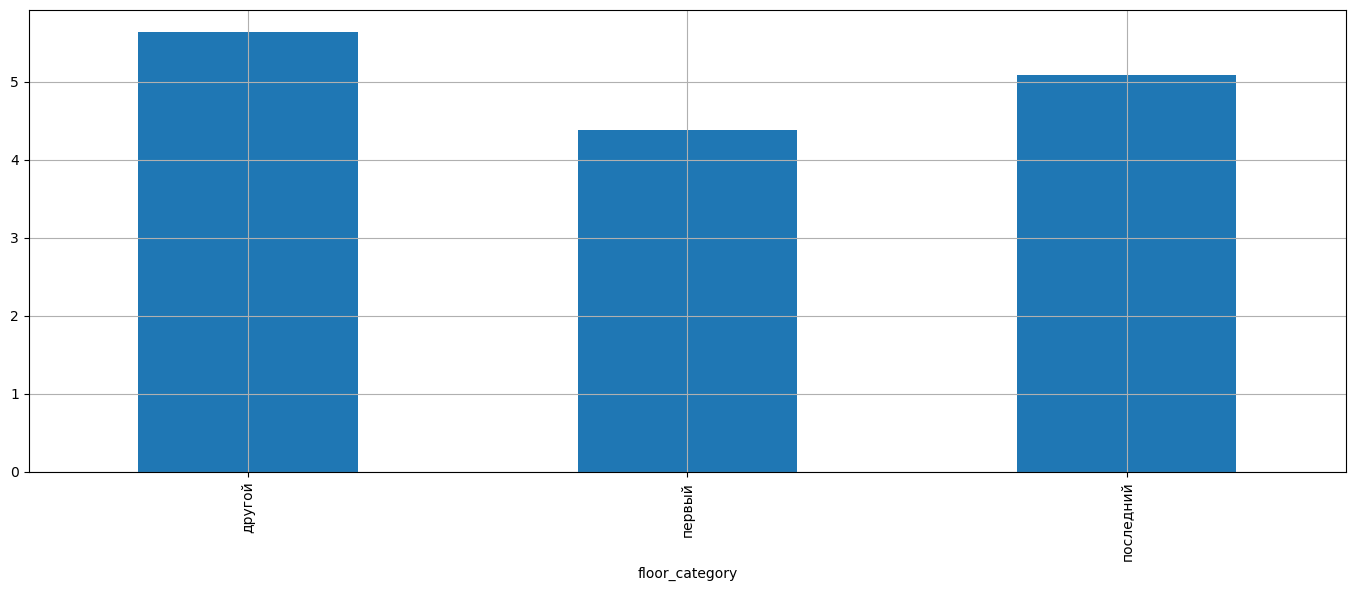

In [73]:
# Зависимость стоимости объекта от категории этажа, на котором расположена квартира - floor_category
floor_category_mean = data.groupby('floor_category')['last_price'].mean()
floor_category_mean.plot(x=floor_category_mean, y=floor_category_mean, kind='bar', grid=True, figsize=(17,6))

In [74]:
floor_category_mean

floor_category
другой       5.636604
первый       4.374003
последний    5.077724
Name: last_price, dtype: float64

Можно заметить, что стоимость объекта в квартирах на первом этаже на 23% ниже, чем на других этажах. Основными причинами являются: недостаточное количество света, более высокий уровень шума, который доносится с улицы, повышенная вероятность кражи, а также загазованность воздуха. 
Стоимость объектов на последнем этаже ниже стоимости на других этажах на 10%. Наиболее распространенным страхом, связанным с покупкой объекта на последнем этаже является боязнь протекающей крыши, которая непременно грозит порчей свежедоделанного ремонта.
Это достаточно распространенные являния, которые мы очередной раз подтвердили результатами данного исследования.

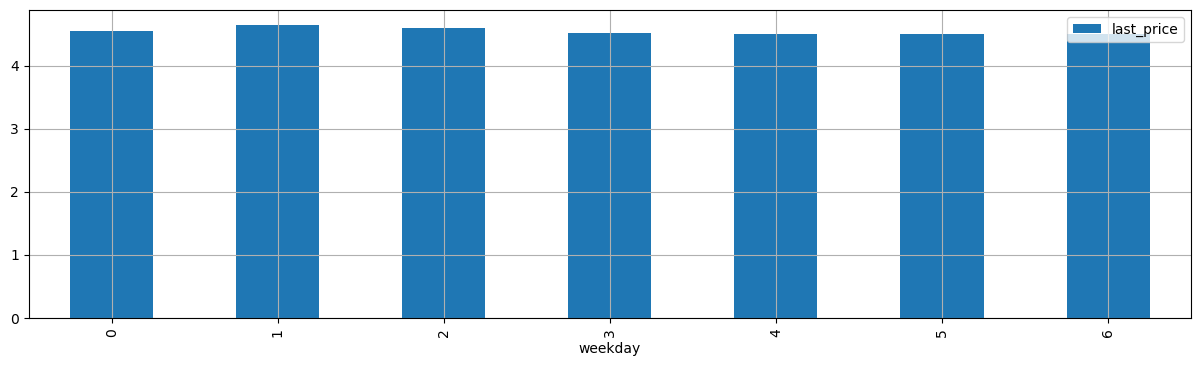

In [75]:
# Зависимость стоимости объекта от даты размещения - weekday/month/year
pivot_table_weekday = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['median'])
#pivot_table_weekday.plot(y = 'median', style = 'o',grid=True, figsize=(17,6))
pivot_table_weekday.plot(y = 'median', kind='bar' ,grid=True, figsize=(15,4));

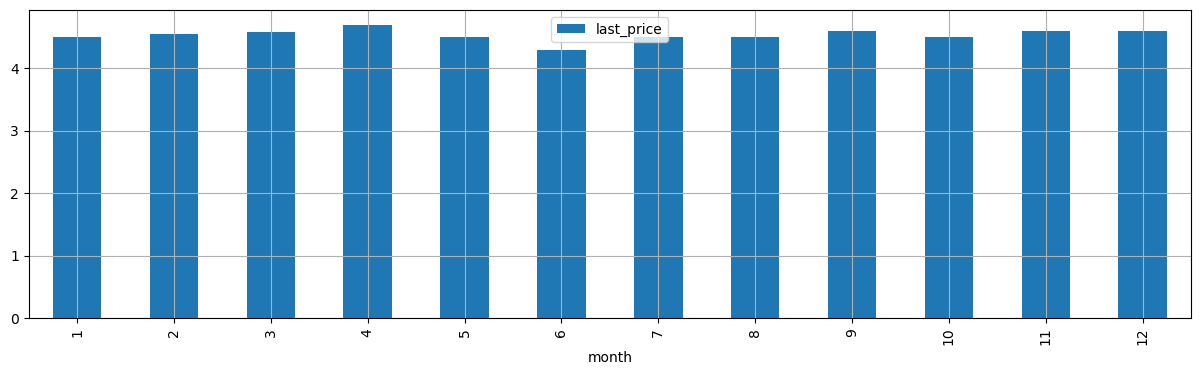

In [76]:
pivot_table_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
pivot_table_month.plot(y = 'median', kind='bar' ,grid=True, figsize=(15,4));

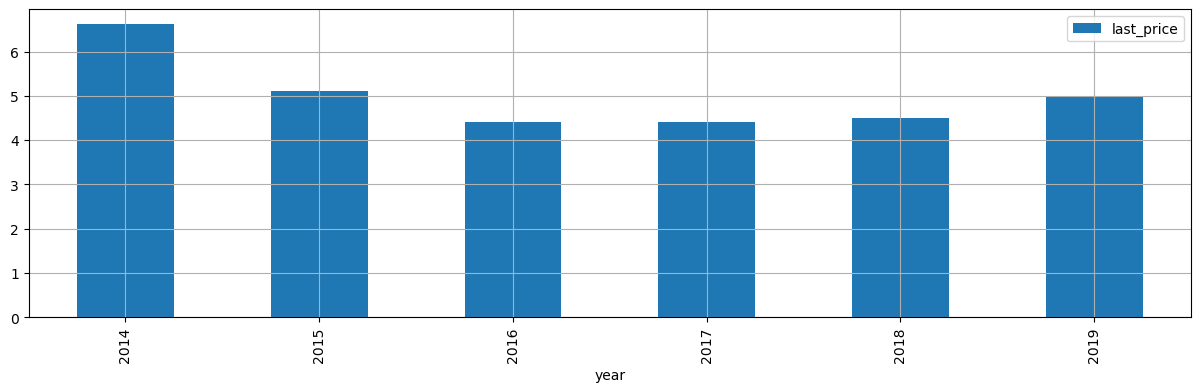

In [77]:
pivot_table_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.plot(y = 'median', kind='bar' ,grid=True, figsize=(15,4));

Зависимость стоимости объекта от даты размещения отсутствует.

Площадь объекта - total_area (соответственно, как и части этой площади living_area и kitchen_area)  влияют на его стоимость  положительным образом.
Стоимость объекта увеличивается с увеличением количества комнат(Коэффициент корреляции = 0,48)
Стоимость объекта на первых и последних этажах  ниже, чем на всех оставшихся.
Корреляция между стоимостью объекта и датой размещения отсутствует.

#### Средняя цена квадратного метра
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.


In [78]:
#Выведем на экран сводную таблицу с самыми популярными населенными пунктами в Лен.области:
pivot_table_10 = data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
pivot_table_10.columns = ['count', 'mean']
pivot_table_10 = pivot_table_10.sort_values('count', ascending = False).head(10)
pivot_table_10

,count,mean
locality_name,,
Санкт-Петербург,14940,108964.317470
поселок Мурино,554,85655.754513
поселок Шушары,440,78676.902273
Всеволожск,396,67161.123737
Пушкин,357,101882.921569
Колпино,337,75332.866469
поселок Парголово,326,90331.837423
Гатчина,306,68757.222222
деревня Кудрово,299,92473.080268


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22823 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             22823 non-null  int64         
 1   last_price               22823 non-null  float64       
 2   total_area               22823 non-null  float64       
 3   first_day_exposition     22823 non-null  datetime64[ns]
 4   rooms                    22823 non-null  int64         
 5   ceiling_height           22823 non-null  float64       
 6   floors_total             22741 non-null  float64       
 7   living_area              21024 non-null  float64       
 8   floor                    22823 non-null  int64         
 9   is_apartment             22823 non-null  bool          
 10  studio                   22823 non-null  bool          
 11  open_plan                22823 non-null  bool          
 12  kitchen_area             20652 non-nu

In [80]:
#самая высокая стоимость
pivot_table_10[pivot_table_10['mean']==pivot_table_10['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14940,108964.31747


In [81]:
#самая низкая стоимость
pivot_table_10[pivot_table_10['mean']==pivot_table_10['mean'].min()]

,count,mean
locality_name,,
Выборг,236,58093.474576


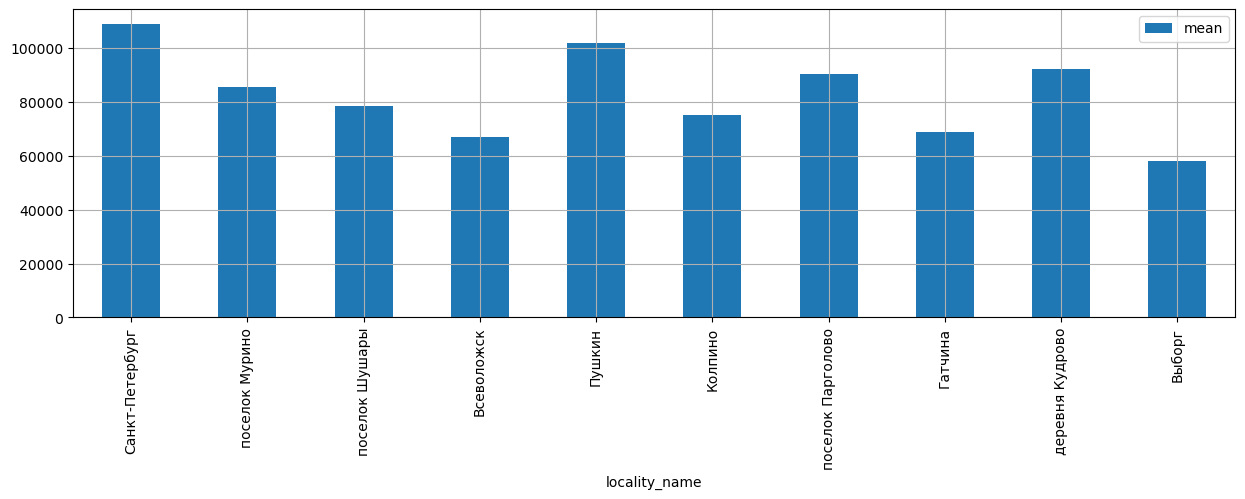

In [82]:
pivot_table_10.plot(y='mean', kind='bar', grid=True, figsize=(15, 4));


Самым популярным городом для покупки недвижимости оказался Санкт-Петербург. Более половины всех исследуемых объектов недвижимости находится именно здесь(14940 из 23041!).
Самая высокая стоимость квадратного метра недвижимости - в Санкт-Петербурге(108964)
Самая низкая стоимость квадратного метра недвижимости - в Выборге(58093), что обусловленно наибольшей удаленностью от Cанкт-Петербурга.

#### Зависимость стоимости объекта от расстояния до центра города
Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name.
Вычислим среднюю цену каждого километра. 
Определим зависимость стоимости объекта от расстояния до центра города.

In [83]:
type(data['city_centers_nearest_km'])

pandas.core.series.Series

In [84]:
#Преобразуем тип данных в 'int'
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int', errors='ignore')
data['city_centers_nearest_km']

0        16.0
1        19.0
2        14.0
4         8.0
5         NaN
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: city_centers_nearest_km, Length: 22823, dtype: float64

,price_per_meter
city_centers_nearest_km,
0.0,112705.916667
1.0,130620.366667
2.0,126285.081301
3.0,113868.869707
4.0,122182.964765
5.0,127439.757497
6.0,127578.206759
7.0,124821.479290
8.0,120869.341155


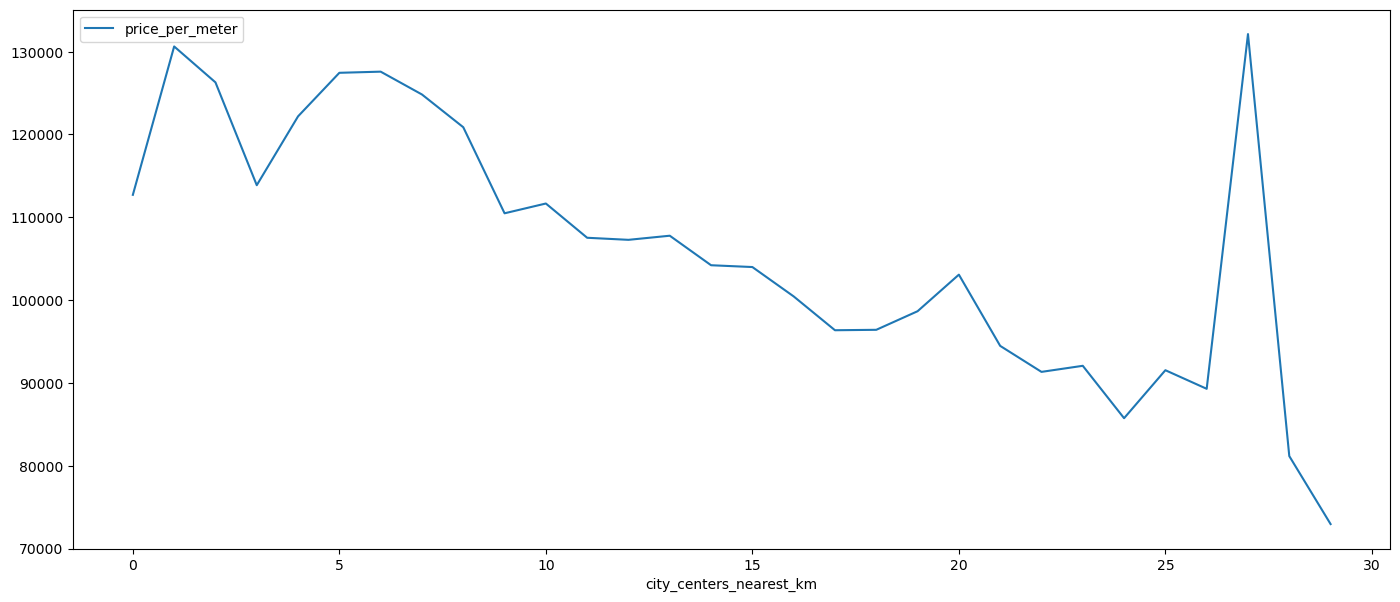

In [85]:
#сводная таблица стоимости каждого километра
pivot_table_centers = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_centers_nearest_km', values = 'price_per_meter')
pivot_table_centers.plot(figsize =(17, 7))
pivot_table_centers

В среднем, мы выявили тенденцию к снижению стоимости квадратного метра жилплощади, по мере удаления объекта недвижимости от центра. Ближе к центру - выше стоимость.
Однако, мы можем заметить несколько всплесков значений, которые могут быть обусловлены более дорогими районами, с соответствующими объектами недвижимости бизнес-класса, либо более крупными городами, недвижимость в которых, очевидно, дороже.

### Общий вывод

Мы успешно обработали полученный архив данных.

**Провели предобработку, куда входили следующие действия:**

поиск, замена и устранение отсутствующих значений в данных;\ Преобразование типов данных в таблице;\
устранение неявных дубликатов в столбце с названиями населенного пункта;\
удаление аномальных значений в данных.

**Добавили к исходной таблице 6 новых столбцов:**

•	цена одного квадратного метра;\
•	день недели публикации объявления;\
•	месяц публикации объявления;\
•	год публикации объявления;\
•	тип этажа квартиры;\
•	расстояние до центра города в километрах 

**Провели исследовательский анализ данных, в ходе которого выяснили следующее:**
- обычно продажа объекта занимает от 45 до 229 дней. Быстрыми считаются продажи в срок до 45 дней. Необычно долгие продажи - более 229 дней.
- Больше всего на общую стоимость last_price влияют следующие факторы: 
- Площадь объекта - total_area = 0,77
- жилая площадь - living_area = 0,66
- площадь кухни - kitchen_area = 0,58 
- количество комнат - rooms = 0,49
- Корреляция между стоимостью объекта и датой размещения отсутствует.
- По мере удаления от центра к переферии стоимость 1 км уменьшается от 112705.9 до 72952.7